# 1.3.3 Same Data Many Ways

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.
(#anchors-in-markdown)
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
#import data
dt_bachelor =  pd.DataFrame(pd.read_csv('unit_1_data/bachelor-contestants.csv'))
dt_bachelorette =  pd.DataFrame(pd.read_csv('unit_1_data/bachelorette-contestants.csv'))

dt_bachelor['gender']='Female'
dt_bachelorette['gender']='Male'
dt_all = dt_bachelor.drop('Height', axis=1)
dt_all = dt_all.append(dt_bachelorette).reset_index(drop=True)
dt_all = dt_all[dt_all['Name']!='Cosetta Blanca'].reset_index(drop=True)
#dt_spotify = pd.DataFrame(pd.read_csv('unit_1_data/spotify.csv'))
#pd.to_datetime()#dt_spotify['Date']=pd.to_datetime(pd.Series(dt_spotify['Date']))

#### 1. Choose one variable to plot 4 ways

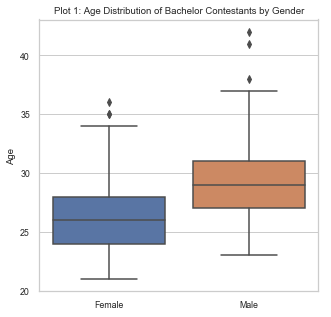

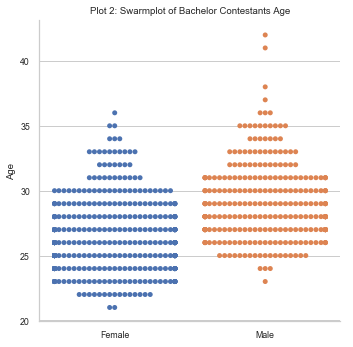

/Users/edise/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


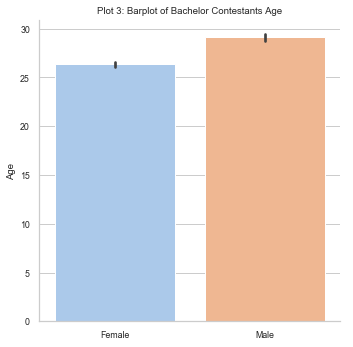

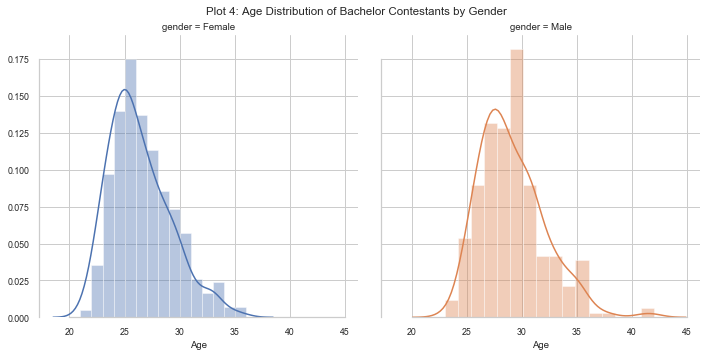

In [3]:
# Plot 1 Boxplot
sns.set(style='whitegrid', font_scale=.8)
ax = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='gender', y='Age', data=dt_all)
ax.set(xlabel='', ylabel='Age')
plt.title("Plot 1: Age Distribution of Bachelor Contestants by Gender")
plt.show()


# Plot 2: Swarmplot
sns.set(style='whitegrid',font_scale=.8)
g = sns.catplot(x="gender", y="Age", kind="swarm", data=dt_all);
g.set(xlabel='', ylabel='Age', title='Plot 2: Swarmplot of Bachelor Contestants Age')
plt.show()


# Plot 3: Barplot
sns.set(style='whitegrid',font_scale=.8)
g = sns.catplot(data=dt_all, kind= 'bar',
                y='Age', x='gender', palette='pastel')

g.set(xlabel='', ylabel='Age', title="Plot 3: Barplot of Bachelor Contestants Age")
plt.show()


# Plot 4: Histograms
sns.set(style='whitegrid',font_scale=.8)
g = sns.FacetGrid(dt_all, col="gender", height=5, hue='gender', sharex=True)
g.map(sns.distplot, "Age")

plt.subplots_adjust(top=.9)
plt.suptitle('Plot 4: Age Distribution of Bachelor Contestants by Gender')
sns.despine(trim=True)
plt.show()

* Plot 1 (boxplot) was useful in illustrating the relative distribution of ages between male and female contestants from the bachelor franchise. This plot would provide less value if we were not comparing two categories

* I was unhappy with plot 2 and plot 3 for this dataset. Since ages in this case are recorded as whole numbers and there is not a significant amount of variation the swarmplot didn't add much information and dynamite plots in genera I feel can be misleading since the visual space that the bar takes up is the average value it is not intuitive for the reader

* Plot 4 was the most detailed and useful plots. It communicates that both male and female contestants skew younger but you can see the center of the distribution is not only shifted left the largest bin is near 30 even though that is now the median itself.


### Choose two continuous variables, and plot them three different ways.
Dataset from kaggle [Top Spotify Tracks of 2017](https://www.kaggle.com/nadintamer/top-tracks-of-2017)

* id - Spotify URI of the song
* name - Name of the song
* artists - Artist(s) of the song
* danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [13]:
dt_spotify = pd.DataFrame(pd.read_csv('unit_1_data/spotify.csv'))
dt_spotify['Date']=pd.to_datetime(pd.Series(dt_spotify['Date']))
dt_spotify.columns = dt_spotify.columns.str.lower().str.replace(' ','_')
dt_spotify = dt_spotify[dt_spotify['region']=='us'].reset_index(drop=True)
dt_spotify.rename(columns={'track_name':'name'}, inplace=True)
dt_spotify.dropna(inplace=True)

dt_top = dt_spotify[(dt_spotify['region']=='us')&(dt_spotify['position']<=30)].reset_index(drop=True)
dt_spotify = dt_spotify[dt_spotify['region']=='us'].reset_index(drop=True)

dt_music = pd.DataFrame(pd.read_csv('unit_1_data/featuresdf.csv'))
dt_music['mode'] = np.where(dt_music['mode']==1,'major(happy)','minor(sad)')
dt_music = dt_music.iloc[:,:-1]

In [18]:
dt_spotify['in_top_ten']=np.where(dt_spotify['position']<=10,1,0)

summary = pd.pivot_table(dt_spotify, index=['name','artist'], 
               values=['streams','position','in_top_ten'], 
               aggfunc={'streams':[sum, np.mean],
                        'position':[min, max, np.mean, len, np.median],
                        'in_top_ten':max})
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary = pd.merge(dt_music, summary, on=['name', 'name'], how='inner')


/Users/edise/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


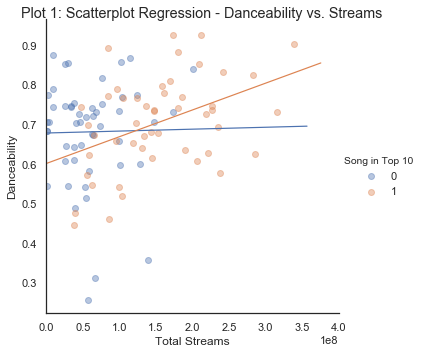

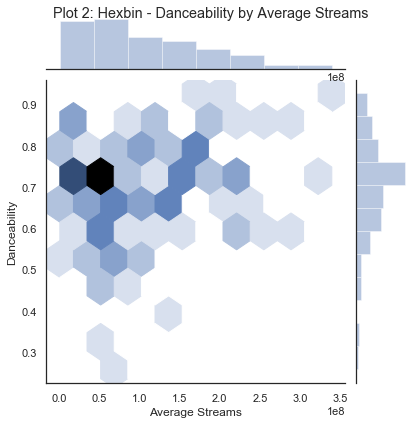

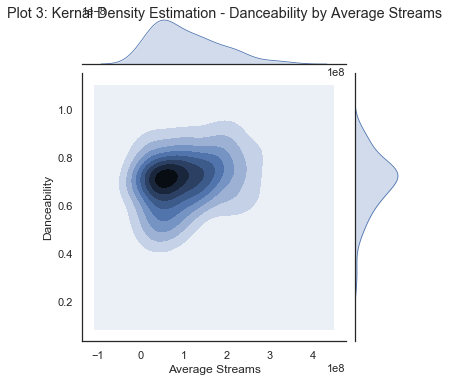

In [159]:
sns.set_context(font_scale=.7, rc={"lines.linewidth":.8})
sns.set_style('white')

g = sns.lmplot(y='danceability', legend=False,
               x='streams_sum',
               hue='in_top_ten_max',
               data=summary, # Data.
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.add_legend(title="Song in Top 10")
g.set_ylabels("Danceability")
g.set_xlabels("Total Streams")
plt.suptitle('Plot 1: Scatterplot Regression - Danceability vs. Streams')
plt.xlim(0,400000000)
plt.show(g);

g = sns.jointplot(x='streams_sum', 
                  y='danceability', 
                  kind="hex", 
                  data=summary)
g.set_axis_labels('Average Streams','Danceability')
plt.suptitle('Plot 2: Hexbin - Danceability by Average Streams')
plt.show(g);

g = sns.jointplot(data=summary, 
                  y='danceability', 
                  x='streams_sum', 
                  kind="kde", height=5.4)
g.set_axis_labels('Average Streams','Danceability')
plt.suptitle('Plot 3: Kernal Density Estimation - Danceability by Average Streams')
plt.show(g);

From these graphs it looks like there is some kind of log relationship between danceability and average streams especially for songs in the top 10. Plot 1 is the most direct for this. I find the hexbins & KDE plots to be a bit much without adding much to additional insight.

In [51]:
def season(x):
    if x < pd.to_datetime('2017-03-01'):
        return 'Winter'
    if x < pd.to_datetime('2017-06-01'):
        return 'Spring'
    if x < pd.to_datetime('2017-10-01'):
        return 'Summer'
    if x < pd.to_datetime('2017-12-01'):
        return 'Fall'
    if x < pd.to_datetime('2018-03-01'):
        return 'Winter'
    
dt_spotify['season']=dt_spotify['date'].apply(lambda x: season(x))

In [52]:
dt_season= pd.pivot_table(dt_spotify, index=['season','name','artist'], 
               values=['streams','position'], 
               aggfunc={'streams':[sum, np.mean, np.median],
                        'position':[min, max, np.mean, len, np.median]})
dt_season.columns = ['_'.join(col).strip() for col in dt_season.columns.values]

dt_season.reset_index(inplace=True)
dt_season_all = pd.merge(dt_season, dt_music, on=['name', 'name'], how='inner')


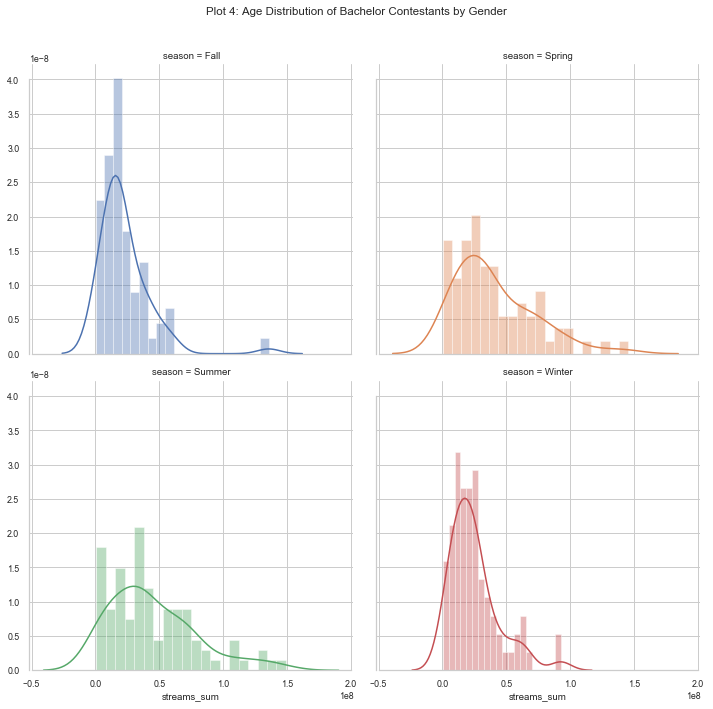

In [122]:
# Plot 4: Histograms
sns.set(style='whitegrid',font_scale=.8,)
g = sns.FacetGrid(dt_season_all, col_wrap=2, 
                  col='season', height=5, 
                  hue='season', sharex=True, sharey=True)
g.map(sns.distplot, "streams_sum", bins=20)

plt.subplots_adjust(top=.9)
plt.suptitle('Distribution of Total Streams of a Song by Season')
sns.despine(trim=True)
plt.show()

In [101]:
order=['Winter', 'Spring', 'Summer', 'Fall']
plot_types = ['swarm','violin', 'boxen', 'point', 'bar']

def plot_me(data, y, kind):
    sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":1})
    g = sns.catplot(x="season", y=y, order=order, data=data, kind=kind, height=5, aspect=1.5)
    g.set_xlabels('')
    g.set_ylabels('Avg Streams')
    plt.title('{} Plot'.format(kind.capitalize()))
    plt.show(g)


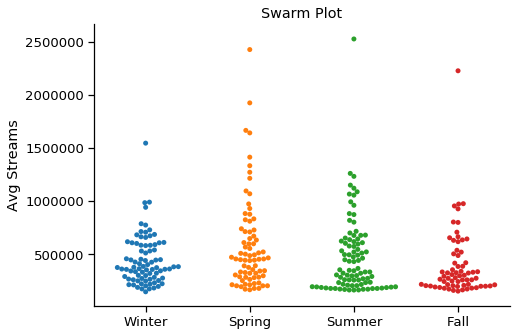

/Users/edise/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


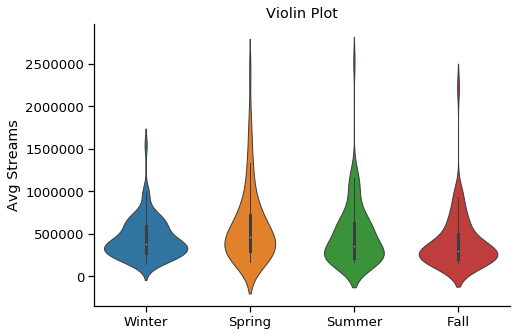

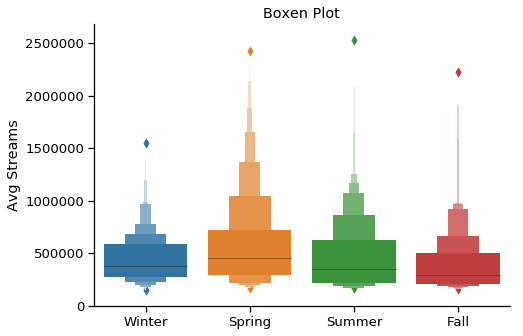

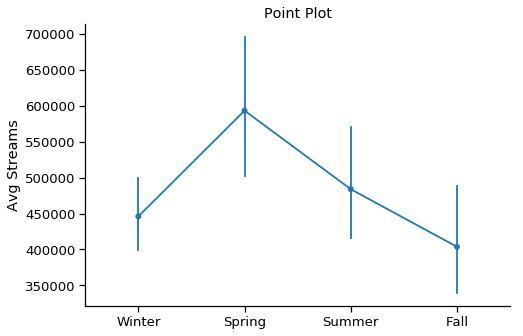

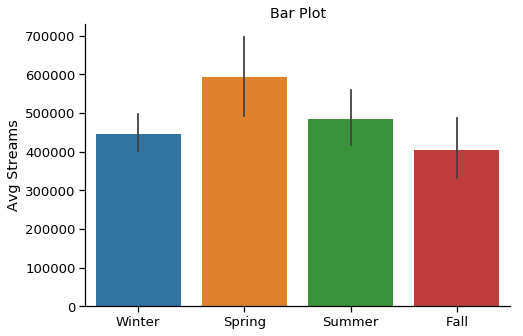

In [102]:
for plot in plot_types:
    plot_me(dt_season_all, 'streams_mean', plot)

For the categorical plots the violen and boxen are interesting to look at but I think they would be distracting to an audience. I can see the swarm plots being useful to show density of results if are ripples that wouldn't have show up in a boxplot.